In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

c_darkblue = "#4c6c9c"
c_darkgreen = "#5e8f7b"
c_purple = "#947db0"

In [5]:
min_len = 50
kmer_list = []
#error_list = [0.0067, 0.013, 0.02, 0.0267, 0.033, 0.04, 0.0467, 0.053]
errors = [1, 2, 3]
error_list = []
for er in errors:
    error_list.append(er / min_len)
for er in error_list:
    errors = int(round(er * min_len))
    for k in range(51, 6, -1):
        if ((min_len - k + 1 - errors * k) > 2):
            kmer_list.append(k) 
            break
            
d = {'k': kmer_list, 'error-rate': error_list}            
error_df = pd.DataFrame(data=d)
print(error_df)

    k  error-rate
0  24        0.02
1  16        0.04
2  12        0.06


In [14]:
min_len = 50
er_rate = 0.025
def get_blast_word_size():
    errors = int(round(er_rate * min_len)) 
    print(errors)
    for k in range(51, 6, -1):
        if ((min_len - k + 1 - errors * k) > 1):
            return k

get_blast_word_size()

1


24

In [4]:
kmer_list = []
#error_list = [0.0067, 0.013, 0.02, 0.0267, 0.033, 0.04, 0.0467, 0.053]
er = 0.10
min_lens = list(range(100, 2000, 100))
er_list = []
for min_len in min_lens:
    errors = int(round(er * min_len))
    er_list.append(errors)
    for k in range(51, 1, -1):
        if ((min_len - k + 1 - errors * k) > 1):
            kmer_list.append(k) 
            break
            
d = {'k': kmer_list, 'min-len': min_lens, "errors": er_list}            
len_df = pd.DataFrame(data=d)
print(len_df)

    k  min-len  errors
0   9      100      10
1   9      200      20
2   9      300      30
3   9      400      40
4   9      500      50
5   9      600      60
6   9      700      70
7   9      800      80
8   9      900      90
9   9     1000     100
10  9     1100     110
11  9     1200     120
12  9     1300     130
13  9     1400     140
14  9     1500     150
15  9     1600     160
16  9     1700     170
17  9     1800     180
18  9     1900     190


In [98]:
word_size(0.0267)

29

In [100]:
def percid_from_k(k):
	kmer_min_seed_dict = {
    		51:      0.0067,
    		49:      0.0130,
    		37:      0.0200,
    		29:      0.0267,
    		24:      0.0330,
    		21:      0.0400,
    		18:      0.0467,
    		16:      0.0530
	}
	return 100 - kmer_min_seed_dict[int(k)] * 100

In [101]:
def word_size(er):
    return error_df[error_df["error-rate"] == er].iloc[0, 0]

def max_er(k):
    return error_df[error_df["k"] == k].iloc[0, 1]


In [106]:
df = pd.read_csv("blast.kmer.accuracy", sep = "\t")
df[['ref','vs', 'query', 'evalue', 'k']] = df['test-file'].str.split('_',expand=True)
df.drop(["vs", "test-file"], axis = 1, inplace = True)
df[['stellar-ref','vs', 'stellar-query', 'min-len', 'error-rate', "repeat-period", "repeat-length"]] = df['truth-file'].str.split('_',expand=True)
df.drop(["vs", "truth-file", "min-len", "missed", "repeat-period", "repeat-length", "stellar-ref", "stellar-query"], axis = 1, inplace = True)
df.evalue = df.evalue.str.lstrip('e')
df.evalue = df.evalue.astype(float)
df.k = df.k.str.lstrip('k')
df.k = df.k.str.rstrip('.bed')
df.k = df.k.str.rstrip('.txt')
df["true-matches"] = df["true-matches"].fillna(0)
df.k = df.k.astype(int)
df["error-rate"] = df["error-rate"].str.lstrip('e')
df["error-rate"] = df["error-rate"].astype(float)
df["fpr"] = df["true-matches"] / df["truth-set-matches"]
df["fnr"] = 1 - df["true-matches"] / df["truth-set-matches"]
df["fnr"] = df["fnr"].clip(lower=0)
df

,matches,truth-set-matches,true-matches,min-overlap,ref,query,evalue,k,error-rate,fpr,fnr
0,3652,65347,0.0,10,mouse,fly,1.000000e-07,29,0.0267,0.000000,1.000000
1,3652,91899,0.0,10,mouse,fly,1.000000e-07,29,0.0330,0.000000,1.000000
2,3652,145202,0.0,10,mouse,fly,1.000000e-07,29,0.0400,0.000000,1.000000
3,5898,65347,0.0,10,mouse,fly,1.000000e-07,24,0.0267,0.000000,1.000000
4,5898,91899,0.0,10,mouse,fly,1.000000e-07,24,0.0330,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
70,280930,91899,13.0,10,mouse,fly,1.000000e+01,16,0.0330,0.000141,0.999859
71,280930,145202,23.0,10,mouse,fly,1.000000e+01,16,0.0400,0.000158,0.999842
72,590425,65347,0.0,10,mouse,fly,1.000000e+01,13,0.0267,0.000000,1.000000
73,590425,91899,15.0,10,mouse,fly,1.000000e+01,13,0.0330,0.000163,0.999837


In [83]:
for er in [0.0267, 0.033, 0.04]:
    k = word_size(er)
    print(df[(df["error-rate"] == er) & (df["k"] == k) & (df["evalue"] == 10) & (df["min-overlap"] == 10)])

    matches  truth-set-matches  true-matches  min-overlap    ref query  \
48    14515              65347             0           10  mouse   fly   

    evalue   k  error-rate  fpr  fnr  
48    10.0  29      0.0267  0.0  1.0  
    matches  truth-set-matches  true-matches  min-overlap    ref query  \
52    44886              91899            13           10  mouse   fly   

    evalue   k  error-rate       fpr       fnr  
52    10.0  24       0.033  0.000141  0.999859  
    matches  truth-set-matches  true-matches  min-overlap    ref query  \
56   101422             145202            23           10  mouse   fly   

    evalue   k  error-rate       fpr       fnr  
56    10.0  21        0.04  0.000158  0.999842  


In [84]:
for er in [0.0267, 0.033, 0.04]:
    k = word_size(er)
    print(df[(df["error-rate"] == er) & (df["k"] == k) & (df["evalue"] == 0.01)& (df["min-overlap"] == 100)])

Empty DataFrame
Columns: [matches, truth-set-matches, true-matches, min-overlap, ref, query, evalue, k, error-rate, fpr, fnr]
Index: []
Empty DataFrame
Columns: [matches, truth-set-matches, true-matches, min-overlap, ref, query, evalue, k, error-rate, fpr, fnr]
Index: []
Empty DataFrame
Columns: [matches, truth-set-matches, true-matches, min-overlap, ref, query, evalue, k, error-rate, fpr, fnr]
Index: []


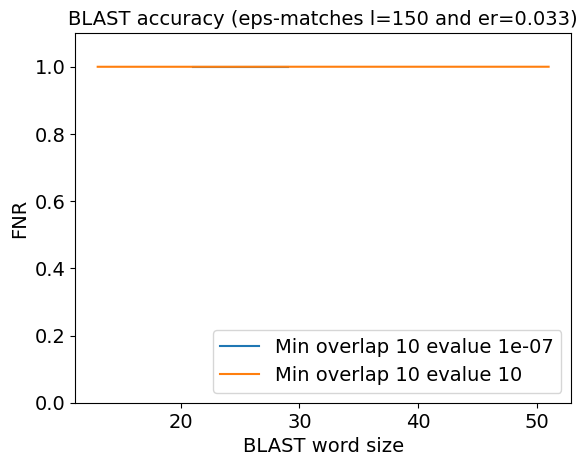

In [107]:
er = 0.033
overlap = 10
evalue = 1e-7
df_slice = df[(df["min-overlap"] == overlap) & (df["evalue"] == evalue) & (df["error-rate"] == er)]
plt.plot(df_slice.k, df_slice.fnr, label = "Min overlap " + str(overlap) + " evalue " + str(evalue))

overlap = 10
evalue = 10
df_slice = df[(df["min-overlap"] == overlap) & (df["evalue"] == evalue) & (df["error-rate"] == er)]
plt.plot(df_slice.k, df_slice.fnr, label = "Min overlap " + str(overlap) + " evalue " + str(evalue))

plt.title("BLAST accuracy (eps-matches l=150 and er=" + str(er) + ")")
plt.ylim(0, 1.1)
plt.xlabel("BLAST word size")
plt.ylabel("FNR")
plt.legend(loc = 'lower right')
plt.show()

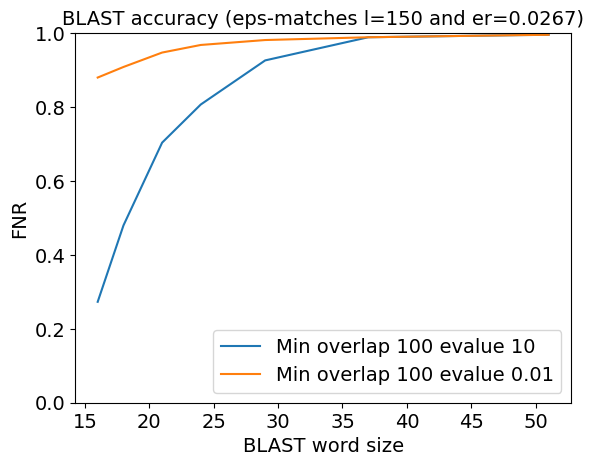

In [52]:
er = 0.0267
for overlap in [100]:
    for evalue in [10, 0.01]:
        df_slice = df[(df["min-overlap"] == overlap) & (df["evalue"] == evalue) & (df["error-rate"] == er)]
        plt.plot(df_slice.k, df_slice.fnr, label = "Min overlap " + str(overlap) + " evalue " + str(evalue))

plt.title("BLAST accuracy (eps-matches l=150 and er=" + str(er) + ")")
plt.ylim(0, 1.0)
plt.xlabel("BLAST word size")
plt.ylabel("FNR")
plt.legend(loc = 'lower right')
plt.show()

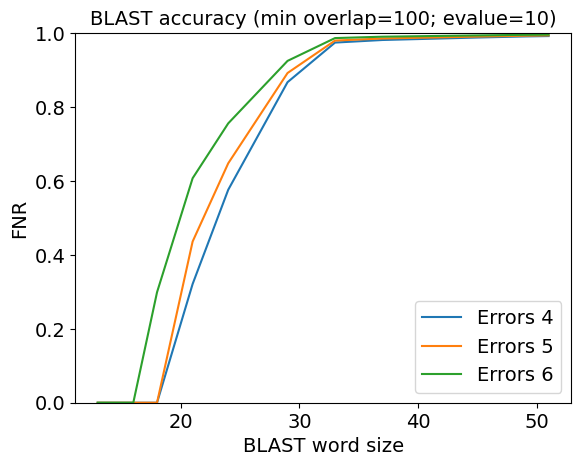

In [77]:
overlap = 100
evalue = 10
for er in [0.0267, 0.033, 0.04]:
    df_slice = df[(df["min-overlap"] == overlap) & (df["evalue"] == evalue) & (df["error-rate"] == er)]
    plt.plot(df_slice.k, df_slice.fnr, label = "Errors " + str(int(np.round(150 * er))))

plt.title("BLAST accuracy (min overlap=" + str(overlap) + "; evalue=" + str(evalue) + ")")
plt.ylim(0, 1.0)
plt.xlabel("BLAST word size")
plt.ylabel("FNR")
plt.legend(loc = 'lower right')
plt.show()